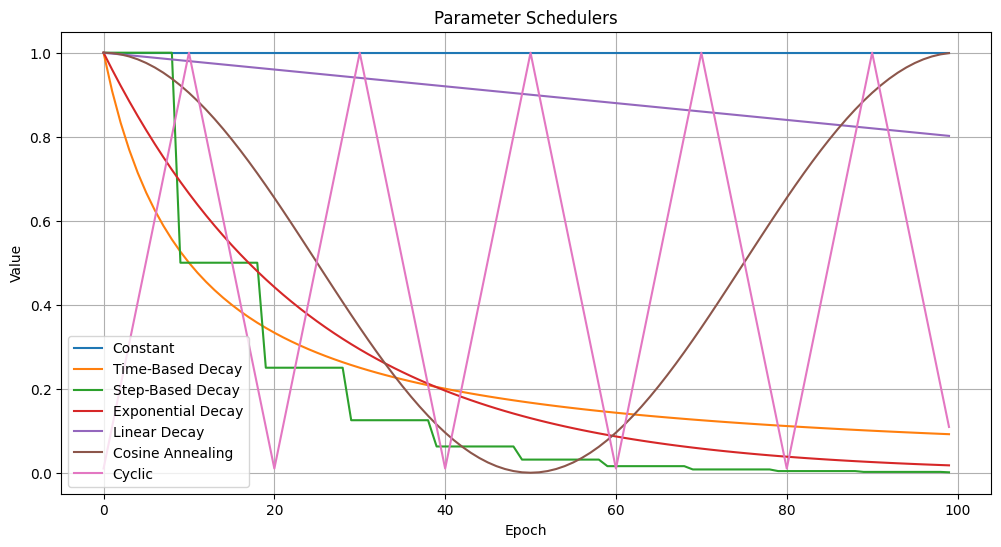

In [10]:
import math
import matplotlib.pyplot as plt

class ParameterScheduler:
    def __init__(self, initial_value, schedule_type='constant', **kwargs):
        self.initial_value = initial_value
        self.schedule_type = schedule_type
        self.kwargs = kwargs

        # Ensure all necessary parameters are provided
        if self.schedule_type == 'time_based':
            if 'decay_rate' not in self.kwargs:
                raise ValueError("decay_rate must be provided for time_based schedule")
        elif self.schedule_type == 'step_based':
            if 'drop_rate' not in self.kwargs or 'epochs_drop' not in self.kwargs:
                raise ValueError("drop_rate and epochs_drop must be provided for step_based schedule")
        elif self.schedule_type == 'exponential':
            if 'decay_rate' not in self.kwargs:
                raise ValueError("decay_rate must be provided for exponential schedule")
        elif self.schedule_type == 'linear':
            if 'absolute_reduction' not in self.kwargs:
                raise ValueError("absolute_reduction must be provided for linear schedule")
        elif self.schedule_type == 'cosine_annealing':
            if 'total_epochs' not in self.kwargs:
                raise ValueError("total_epochs must be provided for cosine_annealing schedule")
        elif self.schedule_type == 'cyclic':
            if 'base_lr' not in self.kwargs or 'max_lr' not in self.kwargs or 'step_size' not in self.kwargs:
                raise ValueError("base_lr, max_lr, and step_size must be provided for cyclic schedule")

    def get_value(self, epoch):
        if self.schedule_type == 'constant':
            value = self.initial_value
        elif self.schedule_type == 'time_based':
            decay_rate = self.kwargs['decay_rate']
            value = self.initial_value / (1 + decay_rate * epoch)
        elif self.schedule_type == 'step_based':
            drop_rate = self.kwargs['drop_rate']
            epochs_drop = self.kwargs['epochs_drop']
            value = self.initial_value * math.pow(drop_rate, math.floor((1 + epoch) / epochs_drop))
        elif self.schedule_type == 'exponential':
            decay_rate = self.kwargs['decay_rate']
            value = self.initial_value * math.pow(decay_rate, epoch)
        elif self.schedule_type == 'linear':
            absolute_reduction = self.kwargs['absolute_reduction']
            value = self.initial_value - absolute_reduction * epoch
        elif self.schedule_type == 'cosine_annealing':
            total_epochs = self.kwargs['total_epochs']
            value = self.initial_value * (1 + math.cos(math.pi * epoch / total_epochs)) / 2
        elif self.schedule_type == 'cyclic':
            base_lr = self.kwargs['base_lr']
            max_lr = self.kwargs['max_lr']
            step_size = self.kwargs['step_size']
            cycle = math.floor(1 + epoch / (2 * step_size))
            x = abs(epoch / step_size - 2 * cycle + 1)
            value = base_lr + (max_lr - base_lr) * max(0, (1 - x))
        else:
            raise ValueError(f"Unknown schedule_type: {self.schedule_type}")

        return value

# Example usage and visualization
if __name__ == "__main__":
    epochs = range(100)
    
    # Define schedulers
    schedulers = {
        'Constant': ParameterScheduler(initial_value=1, schedule_type='constant'),
        'Time-Based Decay': ParameterScheduler(initial_value=1, schedule_type='time_based', decay_rate=0.1),
        'Step-Based Decay': ParameterScheduler(initial_value=1, schedule_type='step_based', drop_rate=0.5, epochs_drop=10),
        'Exponential Decay': ParameterScheduler(initial_value=1, schedule_type='exponential', decay_rate=0.96),
        'Linear Decay': ParameterScheduler(initial_value=1, schedule_type='linear', absolute_reduction=0.002),
        'Cosine Annealing': ParameterScheduler(initial_value=1, schedule_type='cosine_annealing', total_epochs=50),
        'Cyclic': ParameterScheduler(initial_value=1, schedule_type='cyclic', base_lr=0.01, max_lr=1, step_size=10)
    }
    
    # Plot schedulers
    plt.figure(figsize=(12, 6))
    for name, scheduler in schedulers.items():
        values = [scheduler.get_value(epoch) for epoch in epochs]
        plt.plot(epochs, values, label=name)
    
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Parameter Schedulers')
    plt.legend()
    plt.grid(True)
    plt.show()


##### Constant Schedule
$$ \text{value}(t) = \text{initial\_value} $$

In [2]:
scheduler = ParameterScheduler(initial_value=0.1, schedule_type='constant')
for epoch in range(5): print(f"Epoch {epoch}: {scheduler.get_value(epoch)}")

Epoch 0: 0.1
Epoch 1: 0.1
Epoch 2: 0.1
Epoch 3: 0.1
Epoch 4: 0.1


##### Time-Based Decay
$$ \text{value}(t) = \frac{\text{initial\_value}}{1 + \text{decay\_rate} \cdot t} $$

In [3]:
scheduler = ParameterScheduler(initial_value=0.1, schedule_type='time_based', decay_rate=0.1)
for epoch in range(10):
    print(f"Epoch {epoch}: {scheduler.get_value(epoch)}")

Epoch 0: 0.1
Epoch 1: 0.09090909090909091
Epoch 2: 0.08333333333333334
Epoch 3: 0.07692307692307693
Epoch 4: 0.07142857142857144
Epoch 5: 0.06666666666666667
Epoch 6: 0.0625
Epoch 7: 0.058823529411764705
Epoch 8: 0.05555555555555556
Epoch 9: 0.052631578947368425


##### Step-Based Decay
$$ \text{value}(t) = \text{initial\_value} \cdot \left(\text{drop\_rate}\right)^{\left\lfloor \frac{t}{\text{epochs\_drop}} \right\rfloor} $$

In [4]:
scheduler = ParameterScheduler(initial_value=0.1, schedule_type='step_based', drop_rate=0.5, epochs_drop=2)
for epoch in range(10):
    print(f"Epoch {epoch}: {scheduler.get_value(epoch)}")

Epoch 0: 0.1
Epoch 1: 0.05
Epoch 2: 0.05
Epoch 3: 0.025
Epoch 4: 0.025
Epoch 5: 0.0125
Epoch 6: 0.0125
Epoch 7: 0.00625
Epoch 8: 0.00625
Epoch 9: 0.003125


##### Linear Decay
$$ \text{value}(t) = \text{initial\_value} - \text{absolute\_reduction} \cdot t $$

In [5]:
scheduler = ParameterScheduler(initial_value=0.1, schedule_type='linear', absolute_reduction=0.01)
for epoch in range(5):
    print(f"Epoch {epoch}: {scheduler.get_value(epoch)}")

Epoch 0: 0.1
Epoch 1: 0.09000000000000001
Epoch 2: 0.08
Epoch 3: 0.07
Epoch 4: 0.060000000000000005


##### Exponential Decay
$$ \text{value}(t) = \text{initial\_value} \cdot \left(\text{decay\_rate}\right)^t $$

In [6]:
scheduler = ParameterScheduler(initial_value=0.1, schedule_type='exponential', decay_rate=0.9)
for epoch in range(5):
    print(f"Epoch {epoch}: {scheduler.get_value(epoch)}")

Epoch 0: 0.1
Epoch 1: 0.09000000000000001
Epoch 2: 0.08100000000000002
Epoch 3: 0.0729
Epoch 4: 0.06561


##### Cyclic
$$ \text{value}(t) = \text{base\_lr} + 0.5 \cdot (\text{max\_lr} - \text{base\_lr}) \cdot (1 + \cos(\frac{t \cdot \pi}{\text{step\_size}})) $$

In [7]:
scheduler = ParameterScheduler(initial_value=0.1, schedule_type='cyclic', base_lr=0.01, max_lr=0.1, step_size=10)
for epoch in range(20):
    print(f"Epoch {epoch}: {scheduler.get_value(epoch)}")

Epoch 0: 0.01
Epoch 1: 0.01900000000000001
Epoch 2: 0.027999999999999997
Epoch 3: 0.037000000000000005
Epoch 4: 0.046
Epoch 5: 0.05500000000000001
Epoch 6: 0.06400000000000002
Epoch 7: 0.073
Epoch 8: 0.082
Epoch 9: 0.091
Epoch 10: 0.1
Epoch 11: 0.091
Epoch 12: 0.082
Epoch 13: 0.073
Epoch 14: 0.06400000000000002
Epoch 15: 0.05500000000000001
Epoch 16: 0.046
Epoch 17: 0.037000000000000005
Epoch 18: 0.027999999999999997
Epoch 19: 0.01900000000000001


##### Cosine Annealing
$$ \text{value}(t) = \text{initial\_value} \cdot \left( \frac{1 + \cos\left(\frac{t \cdot \pi}{T}\right)}{2} \right) $$

In [8]:
scheduler = ParameterScheduler(initial_value=0.1, schedule_type='cosine_annealing', total_epochs=50)
for epoch in range(50):
    print(f"Epoch {epoch}: {scheduler.get_value(epoch)}")

Epoch 0: 0.1
Epoch 1: 0.09990133642141358
Epoch 2: 0.0996057350657239
Epoch 3: 0.09911436253643445
Epoch 4: 0.09842915805643156
Epoch 5: 0.09755282581475769
Epoch 6: 0.09648882429441258
Epoch 7: 0.09524135262330098
Epoch 8: 0.09381533400219318
Epoch 9: 0.09221639627510075
Epoch 10: 0.09045084971874738
Epoch 11: 0.08852566213878947
Epoch 12: 0.08644843137107058
Epoch 13: 0.08422735529643444
Epoch 14: 0.08187119948743449
Epoch 15: 0.07938926261462367
Epoch 16: 0.07679133974894983
Epoch 17: 0.07408768370508577
Epoch 18: 0.07128896457825364
Epoch 19: 0.06840622763423392
Epoch 20: 0.06545084971874737
Epoch 21: 0.062434494358242734
Epoch 22: 0.05936906572928624
Epoch 23: 0.05626666167821523
Epoch 24: 0.05313952597646568
Epoch 25: 0.05
Epoch 26: 0.04686047402353433
Epoch 27: 0.0437333383217848
Epoch 28: 0.04063093427071377
Epoch 29: 0.03756550564175726
Epoch 30: 0.03454915028125265
Epoch 31: 0.03159377236576612
Epoch 32: 0.02871103542174637
Epoch 33: 0.02591231629491423
Epoch 34: 0.0232086602